## Regresión logística multinomial


# Leer set de datos

In [95]:
import pandas as pd
import warnings

# Desactivar todas las warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# El set de datos no contiene valores vacíos, por lo que se aplicará tratamiento a las columnas para tener información estandarizada

## Utilizar Label Encoder para variables categóricas

In [96]:
#Reemplazar valores binarios (yes/no - Female/Male) por valores binarios númericos (1/0)

#df = df.replace(['no', 'yes'], [0, 1])
#df = df.replace(['Female', 'Male'], [0, 1])


#Asignar variables categóricas
#df['CAEC'] = df['CAEC'].replace(['Sometimes', 'Frequently', 'Always'], [1, 2, 3])
#df['CALC'] = df['CALC'].replace(['Sometimes', 'Frequently', 'Always'], [1, 2, 3])
#df['MTRANS'] = df['MTRANS'].replace(['Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking'], [1, 2, 3, 4, 5])
#df['NObeyesdad'] = df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], [1, 2, 3, 4, 5, 6, 7])

#Utilizando label encoder
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas
categorical_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", 
                       "CALC", "MTRANS", "NObeyesdad"]

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Verificar los resultados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

## Ver correlación entre cada columna respecto a la variable objetivo

## Revisar que la variable objetivo esté balanceada

2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: NObeyesdad, dtype: int64


<Axes: title={'center': 'Distribución de Clases'}>

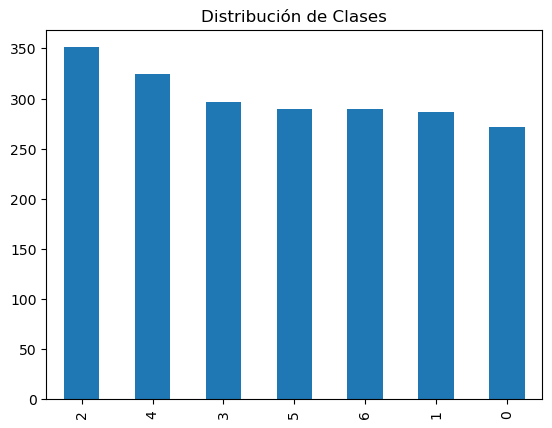

In [98]:
# Calcular la cuenta de valores únicos en la columna 'Clase'
value_counts = df['NObeyesdad'].value_counts()

# Mostrar la cuenta de valores únicos
print(value_counts)

# Visualización de la distribución de clases
value_counts.plot(kind='bar', title='Distribución de Clases')

# Utilizar distintos modelos dentro de cada pipeline y evaluar cual da mejores resultados con distintas configuraciones

In [99]:
import pandas as pd

# Definir los clasificadores y pipelines
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

pipelines = {}

# Crear los pipelines para cada clasificador
for name, classifier in classifiers.items():
    pipelines[name] = Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', classifier)
    ])

# Definir parámetros para GridSearch de cada pipeline
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    'SVM': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__gamma': [0.001, 0.01, 0.1, 1]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

# Almacenar los resultados en un DataFrame
results = []

# Realizar GridSearch para cada pipeline
for name, pipeline in pipelines.items():
    print(f"Evaluando Pipeline: {name}")

    # Obtener el espacio de parámetros correspondiente
    param_grid = param_grids[name]

    # Aplicar GridSearch
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Almacenar los resultados en un DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df['Classifier'] = name
    results.append(results_df)

    # Imprimir los mejores parámetros encontrados en GridSearch
    print(f"Mejores parámetros para {name}: {grid_search.best_params_}")

    # Evaluar el rendimiento en el conjunto de prueba
    accuracy = grid_search.score(X_test, y_test)
    print(f"Exactitud en el conjunto de prueba para {name}: {accuracy}")
    print()

# Combinar los resultados en un único DataFrame
results_df = pd.concat(results, ignore_index=True)


Evaluando Pipeline: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores parámetros para Logistic Regression: {'classifier__C': 100}
Exactitud en el conjunto de prueba para Logistic Regression: 0.9598108747044918

Evaluando Pipeline: SVM
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros para SVM: {'classifier__C': 100, 'classifier__gamma': 0.01}
Exactitud en el conjunto de prueba para SVM: 0.9621749408983451

Evaluando Pipeline: Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros para Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Exactitud en el conjunto de prueba para Random Forest: 0.9574468085106383



In [100]:
# Mostrar el DataFrame con los resultados (para ver el contenido del df obtenido de .cv_results_)
results_df.head(100)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,Classifier,param_classifier__gamma,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators
0,0.017156,0.003177,0.001993,0.000634,0.001,{'classifier__C': 0.001},0.428994,0.411243,0.393491,0.421365,0.400593,0.411137,0.013008,6,Logistic Regression,NaN,NaN,NaN,NaN
1,0.017952,0.002092,0.001995,0.000631,0.01,{'classifier__C': 0.01},0.588757,0.559172,0.562130,0.566766,0.551929,0.565751,0.012472,5,Logistic Regression,NaN,NaN,NaN,NaN
2,0.035904,0.003568,0.002394,0.001017,0.1,{'classifier__C': 0.1},0.698225,0.710059,0.677515,0.691395,0.694362,0.694311,0.010526,4,Logistic Regression,NaN,NaN,NaN,NaN
3,0.071808,0.006308,0.002593,0.001017,1,{'classifier__C': 1},0.840237,0.822485,0.825444,0.810089,0.818991,0.823449,0.009850,3,Logistic Regression,NaN,NaN,NaN,NaN
4,0.066223,0.005520,0.003791,0.000747,10,{'classifier__C': 10},0.917160,0.914201,0.890533,0.893175,0.934718,0.909957,0.016383,2,Logistic Regression,NaN,NaN,NaN,NaN
5,0.073604,0.008062,0.002991,0.000631,100,{'classifier__C': 100},0.946746,0.923077,0.926036,0.919881,0.958457,0.934839,0.015094,1,Logistic Regression,NaN,NaN,NaN,NaN
6,0.144011,0.009114,0.045678,0.001732,0.001,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.159763,0.162722,0.162722,0.163205,0.160237,0.161730,0.001431,17,SVM,0.001,NaN,NaN,NaN
7,0.144215,0.001016,0.045480,0.000485,0.001,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.159763,0.162722,0.162722,0.163205,0.160237,0.161730,0.001431,17,SVM,0.01,NaN,NaN,NaN
8,0.144612,0.001892,0.045080,0.000977,0.001,"{'classifier__C': 0.001, 'classifier__gamma': ...",0.159763,0.162722,0.162722,0.163205,0.160237,0.161730,0.001431,17,SVM,0.1,NaN,NaN,NaN
9,0.140424,0.002393,0.044481,0.001017,0.001,"{'classifier__C': 0.001, 'classifier__gamma': 1}",0.159763,0.162722,0.162722,0.163205,0.160237,0.161730,0.001431,17,SVM,1,NaN,NaN,NaN


## Graficar resultados

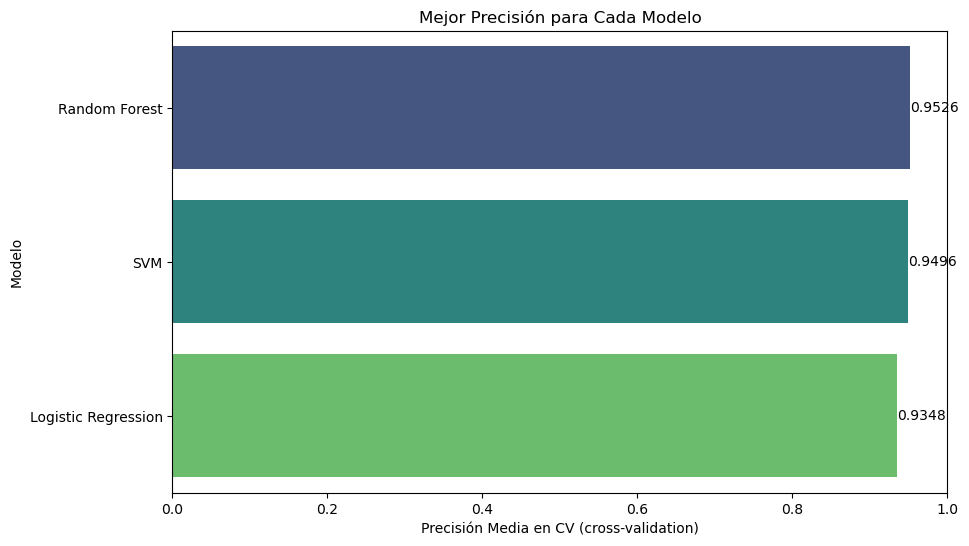

In [101]:
# Filtrar resultados para obtener solo las columnas relevantes
relevant_columns = ['Classifier', 'params', 'mean_test_score']
filtered_results = results_df[relevant_columns]

# Encontrar el mejor resultado para cada clasificador
best_results = filtered_results.groupby('Classifier').apply(lambda x: x[x['mean_test_score'] == x['mean_test_score'].max()])

# Ordenar los resultados por precisión
best_results = best_results.sort_values(by='mean_test_score', ascending=False)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='mean_test_score', y='Classifier', data=best_results, palette='viridis')
plt.title('Mejor Precisión para Cada Modelo')
plt.xlabel('Precisión Media en CV (cross-validation)')
plt.ylabel('Modelo')

# Anotar las barras con los valores de precisión
for index, value in enumerate(best_results['mean_test_score']):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

plt.show()


# Conclusión: Discrepancia en accuracy de evaluación con pipeline y GridSearch vs accuracy en graficado

### El resultado del evaluado con los parametros seleccionados por GridSearch muestra un mejor desempeño para SVM con un accuracy de 0.9622, mientras que en el graficado resulta que Random Forest tiene un accuracy medio más alto con 0.9538 (a comparación de los resultados mostrados en la grafica).

### Esto puede deberse a que en la evaluación con GridSearch, el modelo SVM con los parametros con mejor desempeño dan ese resultado que es más alto comparado con el mismo proceso de los otros modelos. Mientras que en el graficado se está utilizando el accuracy más alto de cada combinación distinta de parametros, lo que hace que Random Forest tenga un accuracy medio más alto, esto debido  que puede contener datos con un accuracy más alto y constante, lo que eleva su precisión media de este valor.